# 1. 푸리에 급수

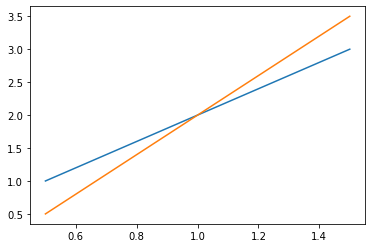

0.2502502502502503

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def error(a, b):
    return np.mean(np.abs(a-b))

#x 설정하는 방법
x = np.linspace(0.5,1.5,1000)

def lin_2x(arg):
    return 2*arg

def lin_3x_1(arg):
    return 3*arg-1

#scalar기준으로 정의한 함수를 numpy에 매핑해주는 함수를 반환함
func1 = np.vectorize(lin_2x)
func2 = np.vectorize(lin_3x_1)

plt.plot(x, func1(x))
plt.plot(x, func2(x))
plt.show()

error(func1(x), func2(x))

### 1.1번 문제 그래프를 그리시오


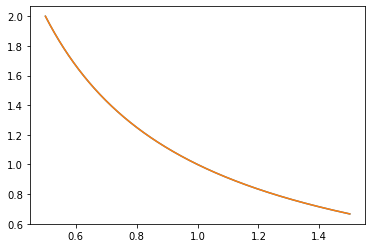

1.9684254226604024e-16

In [2]:
'''
lin_1x 함수로 1/x를 만들었고 lin_taylor1 으로 테일러급수를 만들었습니다.
func3 과 func4는 두 함수를 array로 만든 후 저장한 것입니다.

taylor1의 반복횟수를 10 50 100 1000 으로 해봤는데 100 이후로는 오류의 크기가 별로 차이가 없는 것 같았습니다.
'''
def lin_1x(arg):
    return 1/arg

def lin_taylor1(arg):
    sum = 0
    for i in range(0,100):
        sum += (1-arg)**i
    return sum

func3 = np.vectorize(lin_1x)
func4 = np.vectorize(lin_taylor1)

plt.plot(x, func3(x))
plt.plot(x, func4(x))
plt.show()

error(func3(x), func4(x))

### 1.2번 문제 그래프를 그리시오

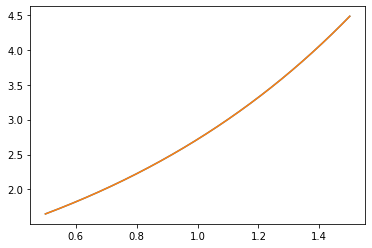

4.496403249731884e-16

In [3]:
'''
Exp 함수로 지수함수를 만들었고 exp_taylor 으로 테일러급수를 만들었습니다.
func5 과 func6는 두 함수를 array로 만든 후 저장한 것입니다.

factorial은 taylor2에서 분모에 들어갈 함수를 만든 것 입니다.

'''
import math

def Exp(arg):
    return math.exp(arg)

def factorial(n):
    if n == 0:
        return 1
    elif n == 1:
        return 1
    else:
        return n*factorial(n-1)

def exp_taylor(arg):
    sum = 0
    for i in range(0,100):
        sum += (arg**i)/factorial(i)
    return sum

func5 = np.vectorize(Exp)
func6 = np.vectorize(exp_taylor)

plt.plot(x, func5(x))
plt.plot(x, func6(x))
plt.show()

error(func5(x), func6(x))


### 1.3번 문제 그래프를 그리시오

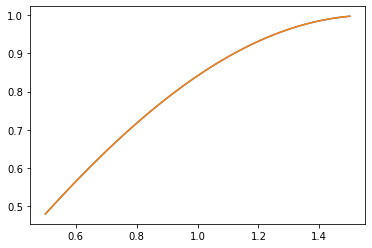

7.432943149865423e-17

In [4]:
'''
sin 함수를 바로 사용할 수도 있었는데 2개의 함수를 만들면 보기 좋을 것 같아서 새 함수로 만들었습니다.
Sin 은 sin함수를 sin_taylor 은 테일러 함수를 나타냈습니다.
테일러 함수를 만들 때 1-2에서 만들었던 factorial 함수를 그대로 사용했고 factorial에 들어가는 수가 커지니까
overflow가 나서 range의 범위를 30으로 줄였습니다
'''
def Sin(arg):
    return np.sin(arg)

def sin_taylor(arg):
    sum = 0
    for i in range(0,30):
        sum += (((-1)**i)*(arg)**(2*i+1))/factorial(2*i+1)
    return sum

func7 = np.vectorize(Sin)
func8 = np.vectorize(sin_taylor)

plt.plot(x, func7(x))
plt.plot(x, func8(x))
plt.show()

error(func7(x), func8(x))


### 1.4번 문제 그래프를 그리시오

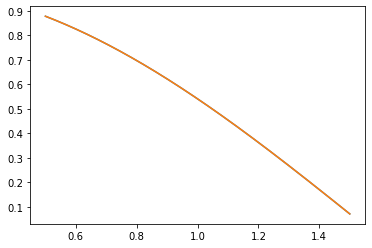

5.891120924417237e-17

In [5]:
'''
위에서 만들었던 sin 함수와 같은 방법으로 cos, taylor 함수를 만들었습니다.

마찬가지로 range는 30까지만 했습니다.
'''
def Cos(arg):
    return np.cos(arg)
def cos_taylor(arg):
    sum = 0
    for i in range(0,30):
        sum += (((-1)**i)*(arg)**(2*i))/factorial(2*i)
    return sum

func9 = np.vectorize(Cos)
func10 = np.vectorize(cos_taylor)

plt.plot(x, func9(x))
plt.plot(x, func10(x))
plt.show()

error(func9(x), func10(x))
    

# 2. 소리 패턴 분석

In [3]:
!pip install librosa -q

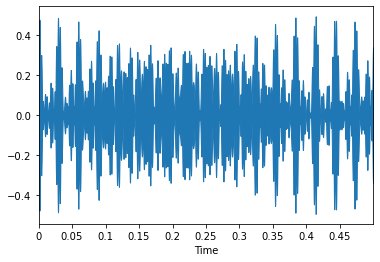

In [4]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure()
filename = "sound.wav"
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [5]:
def mse(fnc):
    label=data
    error=np.abs(label-fnc())
    return np.mean(error)*1500

## 여기서부터 함수를 만들면 됩니다.

In [6]:
def func1():
    #sound는 time에 관한 전체 데이터
    sound = np.zeros(len(data))
    return sound

def func2():
    sound = np.sin(10*np.linspace(0,0.5,len(data)))
    return sound

In [7]:
mse(func1)

211.1571269132653

In [8]:
mse(func2)

999.8791716464935

999.8791716464935


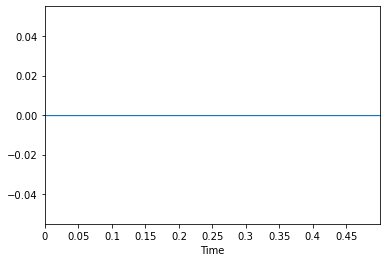

In [219]:
from scipy.io.wavfile import write

savepath = 'test.wav'
write(savepath, 22050, (32500*func1()).astype(np.int16))


testdata,testsample_rate = librosa.load(savepath)
_ = librosa.display.waveplot(testdata,sr=testsample_rate)
print(mse(func2))
ipd.Audio(savepath)


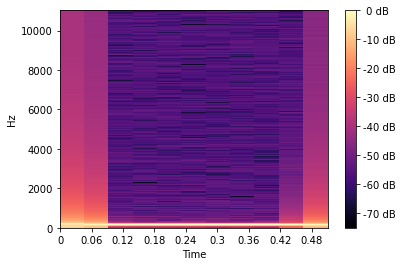

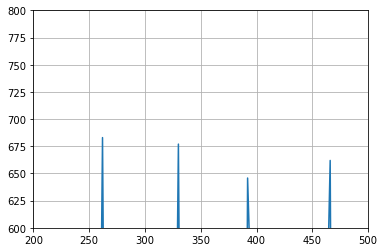

In [214]:
# 음성을 분석할 때 쓰는 방법을 찾다가 발견했습니다
stft_result = librosa.stft(data, n_fft = 4096, win_length = 4096, hop_length = 1024)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr = sample_rate, hop_length = 1024,y_axis='linear',x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

# 푸리에 변환을 사용하기 시작했습니다.
test_value = sample_rate

value = abs(np.fft.fft(data,n = test_value))
time = np.linspace(0,0.5,test_value)

frequency = np.fft.fftfreq(n=test_value,d=0.5/sample_rate)
plt.xlim(200,500,10)
plt.ylim(600,800,100)
plt.grid()
plt.plot(frequency,value)

In [220]:
PI = np.pi
# nn은 진폭을 정확히 구하지 못해서 비율은 유지한채 진폭을 구하기 위해 만든 변수입니다.
nn = 5715

def func_1():
    sound = 683/nn*np.sin(262*PI*np.linspace(0,0.5,len(data)))
    return sound
def func_2():
    sound = 677/nn*np.sin(330*PI*np.linspace(0,0.5,len(data)))
    return sound
def func_3():
    sound = 645.8/nn*np.sin(392*PI*np.linspace(0,0.5,len(data)))
    return sound
def func_4():
    sound = 661.5/nn*np.sin(466*PI*np.linspace(0,0.5,len(data)))
    return sound
def func_final():
    sound = func_1()+func_2()+func_3()+func_4()
    return sound 

# 각 함수들을 파일로 만들었습니다.
wav1 = 'wav1.wav'
write(wav1,22050,(4096*func_1()).astype(np.int16))

wav2 = 'wav2.wav'
write(wav2,22050,(4096*func_2()).astype(np.int16))

wav3 = 'wav3wav'
write(wav3,22050,(4096*func_3()).astype(np.int16))

wav4 = 'wav4.wav'
write(wav4,22050,(4096*func_4()).astype(np.int16))

wav_all = 'wav_all.wav'
write(wav_all,22050,4096*(func_1()+func_2()+func_3()+func_4()).astype(np.int16))

# 4개의 함수와 합친 함수의 그래프를 출력한 것입니다.
testdata,testsample_rate = librosa.load(wav1)
#librosa.display.waveplot(testdata,sr=testsample_rate)

testdata,testsample_rate = librosa.load(wav2)
#librosa.display.waveplot(testdata,sr=testsample_rate)

testdata,testsample_rate = librosa.load(wav3)
#librosa.display.waveplot(testdata,sr=testsample_rate)

testdata,testsample_rate = librosa.load(wav4)
#librosa.display.waveplot(testdata,sr=testsample_rate)

testdata,testsample_rate = librosa.load(wav_all)
#librosa.display.waveplot(testdata,sr=testsample_rate)


#오류 출력
print(mse(func_final))


87.84968740490763


## 고찰

In [ ]:
'''
2017120097 이지우

2번 문제를 봤을 때 너무 간단하게 생각해서 주어진 음성의 그래프에서 파장을 눈으로 보고 여러 함수들을 넣어서 때려 맞추려고 했는데
전혀 통하지 않았었습니다. 이렇게 하는게 아닌 것 같기는 한데 다른 방법이 떠오르지 않아서 질의응답 게시판을 이용했고 푸리에 변환을
추천하는 댓글이 도움이 많이 됐습니다. 

푸리에 변환을 다시 읽어보고 구글링으로 파이썬으로 푸리에 변환을 하는 방법을 찾아봤습니다. 푸리에 변환을 완벽하게 이해하지 못했지만
파이썬에서 함수로 사용할 수 있어서 편리했고 data와 sample_rate, np.fft.fft()함수를 가지고 푸리에 변환을 할 수 있었습니다.
그냥 fft.fft()를 사용하면 복소수로 출력되서 다른 함수에 사용하기 위해 abs로 절댓값으로 바꿔줘서 진폭을 얻었고
fft.fftfreq() 함수에 sample_rate와 눈금 크기를 넣어서 주기를 구했습니다.

위에서 구한 주기와 진폭으로 plt.plot을 써서 음성파일의 그래프를 만들 때 x와 y 범위를 조정하면 4개의 주파수에서 피크값을 갖는데
이 값이 구하려고 하는 삼각함수의 주파수입니다.

주파수는 주기의 역수이니까 금방 계산해서 sin함수에 넣을 수 있었습니다. 그런데 삼각함수의 진폭을 구하는 방법을 정확히 모르고 아까
구했던 진폭의 비율을 이용해서 비율만 유지하고 숫자를 바꿔보면서 오차를 줄였습니다.

끝으로 아직 완전히 푸리에 변환을 사용하지 못하는 것 같아서 관련된 글을 읽어보려고 하고 87의 오차를 줄이려고 이것 저것 해봐도
구할 수 없었어서 아쉬웠습니다. 마무리하기 까지 제출 마지막날까지 걸려서 힘들기도 했지만 오차가 줄었을 때 뿌듯했습니다.


'''